In [141]:
# import libraries 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Loading data 

In [142]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [143]:
print (X_train.shape)
print (X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [144]:
y_train.shape

(50000, 1)

In [145]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [146]:
y_test.shape

(10000, 1)

In [147]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

y datasets are 2D arrays, converting them to 1D arrays for classification


In [148]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [149]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

### Set classes and plot images to see the images

In [150]:
# Set classes

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [151]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

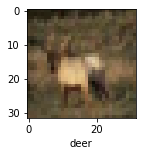

In [152]:
plot_sample(X_train, y_train, 3)


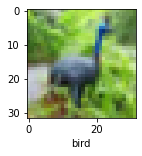

In [153]:
plot_sample(X_train, y_train, 6)


### Normalizing the training data
Normalizing the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Therefore, we divide them by 255 in order to normalize them to the range of 0 to 1. 

In [159]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [160]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Building a convolutional neural network to train the images

In [161]:
# Building CNN

cnn = models.Sequential([
    
    # add convolution layer (detecting the features) and MaxPooling layer 
    
    # detecting the features, filter = 32 (32 features or edges), so that can detect 32 features in the images 
    # define filter size: 3*3
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # can use maxpooling or avearge pooling 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Dense 
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # softmax can normolise % , better than sigmoid
])

In [162]:
# compile CNN
# optimizer : can use sgd adam or adam 

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [163]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5855 - accuracy: 0.4210
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2420 - accuracy: 0.5566
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1044 - accuracy: 0.6112
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0065 - accuracy: 0.6460
Epoch 5/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9463 - accuracy: 0.6691


In [164]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9912 - accuracy: 0.6549


[0.9912089705467224, 0.6549000144004822]

#### CNN2: Use average pooling instead of  max pooling

In [165]:
cnn2 = models.Sequential([
    
    # using average pooling 
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # softmax can normolise % , better than sigmoid
])

In [166]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [167]:
cnn2.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 20s 12ms/step - loss: 1.6790 - accuracy: 0.3869
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3862 - accuracy: 0.5003
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2428 - accuracy: 0.5562
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1428 - accuracy: 0.5947
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0755 - accuracy: 0.6202


In [168]:
cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0618 - accuracy: 0.6230


[1.0617762804031372, 0.6230000257492065]

#### CNN3: Use sigmoid instead of softmax

In [169]:
cnn3 = models.Sequential([
    
    # using average pooling 
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')  # softmax can normolise % , better than sigmoid
])

In [170]:
cnn3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
cnn3.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5942 - accuracy: 0.4167
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2457 - accuracy: 0.5564
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1049 - accuracy: 0.6106
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0060 - accuracy: 0.6448
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9378 - accuracy: 0.6720


In [172]:
cnn3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0230 - accuracy: 0.6420


[1.0229744911193848, 0.6420000195503235]

#### Increasing epochs of CNN from 5 to 10 

In [173]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8925 - accuracy: 0.6885
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8493 - accuracy: 0.7020
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8076 - accuracy: 0.7184
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7781 - accuracy: 0.7302
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7451 - accuracy: 0.7410
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7237 - accuracy: 0.7463
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7025 - accuracy: 0.7534
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6791 - accuracy: 0.7609
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6602 - accuracy: 0.7696
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [174]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8999 - accuracy: 0.6979


[0.8998551964759827, 0.6978999972343445]

### Model prediction

In [175]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [176]:
# use the model to predict  
y_predict = cnn.predict(X_test)
y_predict[:5]

array([[3.5394747e-03, 5.4374053e-03, 3.5035203e-03, 8.2923782e-01,
        1.7083028e-03, 7.3953792e-02, 5.5642176e-02, 2.8575913e-04,
        2.4724172e-02, 1.9675624e-03],
       [1.3941220e-03, 2.3911321e-03, 5.2266480e-09, 2.9817119e-07,
        2.2888617e-08, 1.5272479e-09, 1.1803301e-09, 2.1923727e-09,
        9.9607903e-01, 1.3534068e-04],
       [2.3845318e-01, 4.2870507e-02, 2.9983744e-03, 9.9518141e-03,
        1.7014233e-03, 2.8054295e-03, 8.7263912e-04, 3.6805549e-03,
        5.4983205e-01, 1.4683409e-01],
       [9.3474036e-01, 3.5059184e-02, 1.7179705e-02, 4.5881144e-04,
        3.4616874e-03, 8.5434067e-06, 3.1480881e-06, 6.5425470e-06,
        5.9197927e-03, 3.1623365e-03],
       [5.6232795e-07, 6.7366312e-07, 9.9232802e-03, 2.6791874e-02,
        7.9814541e-01, 3.0466772e-03, 1.6205935e-01, 7.0378028e-06,
        2.5005966e-05, 1.3964916e-07]], dtype=float32)

In [177]:
y_predict_classes = [np.argmax(element) for element in y_predict]
y_predict_classes[:5]

[3, 8, 8, 0, 4]

In [178]:
# compare with the correct answer 
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

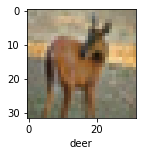

In [183]:
# check 36th image, which is ship (the answer)
plot_sample(X_test,y_test,36)

In [185]:
# predict the answer with the cnn model for the single image (the prediction)
classes[y_predict_classes[36]]

'deer'

In [186]:
from sklearn.metrics import classification_report

In [187]:
# classification report 
# what terms represent for 

print ("classification report: \n", classification_report(y_test, y_predict_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.88      0.75      0.81      1000
           2       0.64      0.53      0.58      1000
           3       0.58      0.44      0.50      1000
           4       0.57      0.71      0.63      1000
           5       0.60      0.63      0.61      1000
           6       0.70      0.84      0.76      1000
           7       0.71      0.74      0.73      1000
           8       0.84      0.78      0.81      1000
           9       0.73      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



### Reference:
codebasics 2020, ‘Image classification using CNN (CIFAR10 dataset) | Deep Learning Tutorial 24 (Tensorflow & Python)’, youtube, <https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=25>

Avinash Kumar 2020, 'Image Classification on CIFAR10 using Neural Networks (NN)', medium, <https://medium.com/@avinashshah099/image-classification-on-cifar10-using-neural-networks-nn-53fc159f0d93>
